### Global Unemployment Dataset
### https://www.kaggle.com/datasets/sazidthe1/global-unemployment-data/data


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
csvFile = pd.read_csv('global_unemployment_data.csv')
csvFile.head()


C:\Users\cheng\AppData\Local\Temp\ipykernel_17624\1813536033.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,country_name,indicator_name,sex,age_group,age_categories,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,Unemployment rate by sex and age,Female,15-24,Youth,13.340,15.974,18.570,21.137,20.649,20.154,21.228,21.640,30.561,32.200,33.332
1,Afghanistan,Unemployment rate by sex and age,Female,25+,Adults,8.576,9.014,9.463,9.920,11.223,12.587,14.079,14.415,23.818,26.192,28.298
2,Afghanistan,Unemployment rate by sex and age,Female,Under 15,Children,10.306,11.552,12.789,14.017,14.706,15.418,16.783,17.134,26.746,29.193,30.956
3,Afghanistan,Unemployment rate by sex and age,Male,15-24,Youth,9.206,11.502,13.772,16.027,15.199,14.361,14.452,15.099,16.655,18.512,19.770
4,Afghanistan,Unemployment rate by sex and age,Male,25+,Adults,6.463,6.879,7.301,7.728,7.833,7.961,8.732,9.199,11.357,12.327,13.087


In [2]:
csvFile.shape


(1134, 16)

In [3]:
csvFile.info


<bound method DataFrame.info of      country_name                    indicator_name     sex age_group  \
0     Afghanistan  Unemployment rate by sex and age  Female     15-24   
1     Afghanistan  Unemployment rate by sex and age  Female       25+   
2     Afghanistan  Unemployment rate by sex and age  Female  Under 15   
3     Afghanistan  Unemployment rate by sex and age    Male     15-24   
4     Afghanistan  Unemployment rate by sex and age    Male       25+   
...           ...                               ...     ...       ...   
1129     Zimbabwe  Unemployment rate by sex and age  Female       25+   
1130     Zimbabwe  Unemployment rate by sex and age  Female  Under 15   
1131     Zimbabwe  Unemployment rate by sex and age    Male     15-24   
1132     Zimbabwe  Unemployment rate by sex and age    Male       25+   
1133     Zimbabwe  Unemployment rate by sex and age    Male  Under 15   

     age_categories    2014    2015    2016    2017    2018    2019    2020  \
0           

In [4]:
csvFile.describe()


,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
count,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1128.000000,1122.000000,1122.000000
mean,11.387800,11.272444,11.122963,10.863516,10.516499,10.311452,11.851285,11.422645,10.340361,9.985181,9.940089
std,11.119002,10.915942,10.742947,10.640980,10.527773,10.297952,11.231580,10.873412,10.264810,9.987778,9.977512
min,0.027000,0.034000,0.038000,0.035000,0.044000,0.036000,0.056000,0.064000,0.067000,0.063000,0.060000
25%,3.933500,3.993500,3.945250,3.747500,3.672750,3.538500,4.334500,4.153500,3.555250,3.477500,3.459750
50%,7.697500,7.547500,7.504500,7.140500,6.706000,6.627500,8.067500,7.542500,6.571500,6.466000,6.364000
75%,15.050750,14.766250,14.467500,14.142000,13.343000,13.285500,15.316250,14.881500,13.410000,12.914500,12.687750
max,74.485000,74.655000,74.720000,75.416000,76.395000,77.173000,83.990000,82.135000,78.776000,78.541000,78.644000


In [5]:
csvFile.isnull().sum()


country_name       0
indicator_name     0
sex                0
age_group          0
age_categories     0
2014               0
2015               0
2016               0
2017               0
2018               0
2019               0
2020               0
2021               0
2022               6
2023              12
2024              12
dtype: int64

In [6]:
percent_missing = csvFile.isnull().sum() * 100 / len(csvFile)
missing_table = pd.DataFrame({'column_name': csvFile.columns,
                              'percent_missing': percent_missing})

missing_table


,column_name,percent_missing
country_name,country_name,0.000000
indicator_name,indicator_name,0.000000
sex,sex,0.000000
age_group,age_group,0.000000
age_categories,age_categories,0.000000
2014,2014,0.000000
2015,2015,0.000000
2016,2016,0.000000
2017,2017,0.000000
2018,2018,0.000000


In [7]:
## Replacing the null values in Year using median
median_value = csvFile['2022'].median()
csvFile['2022'].fillna(median_value, inplace=True)

median_value


C:\Users\cheng\AppData\Local\Temp\ipykernel_17624\617194472.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  csvFile['2022'].fillna(median_value, inplace=True)


6.5715

In [8]:
csvFile.isnull().sum()


country_name       0
indicator_name     0
sex                0
age_group          0
age_categories     0
2014               0
2015               0
2016               0
2017               0
2018               0
2019               0
2020               0
2021               0
2022               0
2023              12
2024              12
dtype: int64

In [9]:
# replacing the others as well
median_value_2023 = csvFile['2023'].median()
csvFile.fillna({'2023':median_value_2023}, inplace=True)
median_value_2024 = csvFile['2024'].median()
csvFile.fillna({'2024':median_value_2024}, inplace=True)


In [10]:
csvFile.isnull().sum()


country_name      0
indicator_name    0
sex               0
age_group         0
age_categories    0
2014              0
2015              0
2016              0
2017              0
2018              0
2019              0
2020              0
2021              0
2022              0
2023              0
2024              0
dtype: int64

In [11]:
data = csvFile.drop('indicator_name', axis = 1)
data.head()

,country_name,sex,age_group,age_categories,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,Female,15-24,Youth,13.340,15.974,18.570,21.137,20.649,20.154,21.228,21.640,30.561,32.200,33.332
1,Afghanistan,Female,25+,Adults,8.576,9.014,9.463,9.920,11.223,12.587,14.079,14.415,23.818,26.192,28.298
2,Afghanistan,Female,Under 15,Children,10.306,11.552,12.789,14.017,14.706,15.418,16.783,17.134,26.746,29.193,30.956
3,Afghanistan,Male,15-24,Youth,9.206,11.502,13.772,16.027,15.199,14.361,14.452,15.099,16.655,18.512,19.770
4,Afghanistan,Male,25+,Adults,6.463,6.879,7.301,7.728,7.833,7.961,8.732,9.199,11.357,12.327,13.087


In [12]:
Unemployment_US = data[data['country_name']=='United States']
Unemployment_US_Adults = data[(data['country_name']=='United States') &(data['age_categories']=='Adults')]
Unemployment_US_Adults

,country_name,sex,age_group,age_categories,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
1075,United States,Female,25+,Adults,5.054,4.322,4.058,3.707,3.234,3.024,7.347,4.628,3.007,2.904,3.098
1078,United States,Male,25+,Adults,4.988,4.253,3.973,3.530,3.155,2.912,6.794,4.739,2.952,3.063,3.257


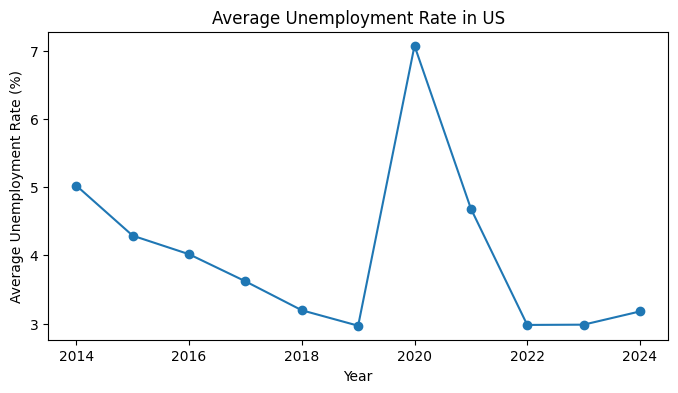

In [13]:
years = [str(i) for i in range(2014,2025)]
avg_unemployment = Unemployment_US_Adults[years].mean()
plt.figure(figsize=(8,4))
avg_unemployment.plot(kind='line', marker='o')
plt.title('Average Unemployment Rate in US')
plt.xlabel('Year')
plt.ylabel('Average Unemployment Rate (%)')
plt.show()

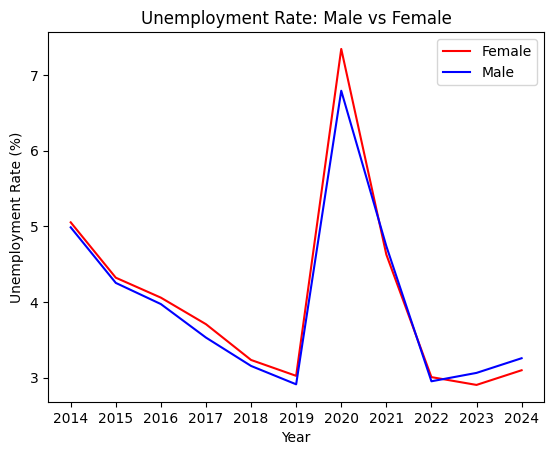

In [17]:
years = [str(i) for i in range(2014,2025)]
female_US = Unemployment_US_Adults.loc[1075][4:] # cleaning unwanted tags
male_US = Unemployment_US_Adults.loc[1078][4:]
plt.plot(female_US.index, female_US.values, 'r', label='Female')
plt.plot(male_US.index, male_US.values, 'b', label='Male')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate: Male vs Female')
plt.legend()
plt.show()